# RUN WITH PYTHON 3.5 AND PANDAS 0.20.1

# UNSW-NB 15 Dataset Feed Forward ML Model - Attack Type Classification 



UNSW-NB15 is a network traffic data set with different categories for normal activities and synthetic attack behaviours.

This project includes a diffent approach to the classification model for UNSW-NB15 data set then before. This model developed using a random forest and feed-forward neural network. The system uses the random forest that classifies data to normal or malicious data. This information is then used to train a neural network to further classify the attack data to different attack categories. 

Solves:Detailed clarification of what types of attacks your classification is likely to miss and how methods might be improved.


This notebook will the follwing machine learning methods:

- Random Forest : For Attack or Normal Classifier
- Feed Forward Neural Networks: For Attack Type Classifier

We will illustrate this ML model approach and compare the performances.


The raw network packets of the UNSW-NB 15 dataset was created by the IXIA PerfectStorm tool in the Cyber Range Lab of the Australian Centre for Cyber Security (ACCS) for generating a hybrid of real modern normal activities and synthetic contemporary attack behaviours. Further information found at https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/



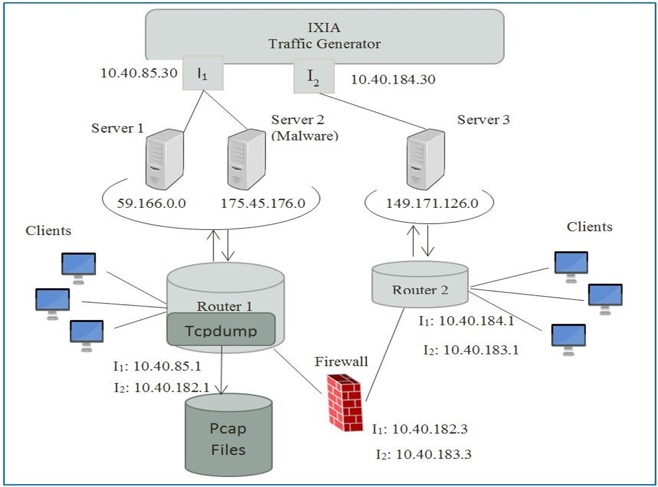









Tcpdump tool is utilised to capture 100 GB of the raw traffic (e.g., Pcap files). This dataset has nine types of attacks, namely, Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms. The Argus, Bro-IDS tools are used and twelve algorithms are developed to generate totally 49 features with the class label.

These features are described in UNSW-NB15_features.csv file.

The total number of records is 2,540,044 which are stored in the four CSV files, namely, UNSW-NB15_1.csv, UNSW-NB15_2.csv, UNSW-NB15_3.csv and UNSW-NB15_4.csv.


The details of the UNSW-NB15 dataset are published in following the papers:

Moustafa, Nour, and Jill Slay. "UNSW-NB15: a comprehensive data set for network intrusion detection systems (UNSW-NB15 network data set)." Military Communications and Information Systems Conference (MilCIS), 2015. IEEE, 2015.
Moustafa, Nour, and Jill Slay. "The evaluation of Network Anomaly Detection Systems: Statistical analysis of the UNSW-NB15 dataset and the comparison with the KDD99 dataset." Information Security Journal: A Global Perspective (2016): 1-14.
Moustafa, Nour, et al. . "Novel geometric area analysis technique for anomaly detection using trapezoidal area estimation on large-scale networks." IEEE Transactions on Big Data (2017).
Moustafa, Nour, et al. "Big data analytics for intrusion detection system: statistical decision-making using finite dirichlet mixture models." Data Analytics and Decision Support for Cybersecurity. Springer, Cham, 2017. 127-156.






For more information, please contact the authors: Harshil Patel & Yuesheng Chen are a students in Industrial Engineering at Ohio State University, and they are interested in new Cyber threat intelligence approaches and the technology of Industry 4.0. 

In this notebook, the operations conducted include:

- Preprocessing the data to prepare for training ML models.
- Creating datsets for feed-forward ML model.
- Training ML models based RM and ANN.
- Evaluating ML model based on testing data.

# Data Information

**UNSW-NB15: a comprehensive data set for network intrusion detection systems**

These features are described in UNSW-NB15_features.csv file.

A partition from this dataset is configured as a training set and testing set, namely, UNSW_NB15_training-set.csv and UNSW_NB15_testing-set.csv respectively.

The number of records in the training set is 175,341 records and the testing set is 82,332 records from the different types, attack and normal.Figure 1 and 2 show the testbed configuration dataset and the method of the feature creation of the UNSW-NB15, respectively. The addtional features are as described in UNSW-NB15_features.csv file.


### Response Features


attack_class= This dataset has nine types of attacks, namely, Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms.

Label=attack or normal behavior

##### Created on Monday April 20th 2020
@author: Harshil Patel

# 3.) Fit Neural Net 

In [5]:
!pip install keras==1.2.2

  Created wheel for keras: filename=Keras-1.2.2-py3-none-any.whl size=209606 sha256=597097cc62515652e029907640a25e6ece3a434f9aa51dc220c990b3c4f4b193
  Stored in directory: c:\users\harshil patel\appdata\local\pip\cache\wheels\d1\32\23\2a1db3765ec19c91503843380a4f92b6530598949c661c5fa2
  Created wheel for theano: filename=Theano-1.0.4-py3-none-any.whl size=2667194 sha256=02b9e2abe68433990f68204568a69bdc41031bcc9482ee29bdc89ca6f6479806
  Stored in directory: c:\users\harshil patel\appdata\local\pip\cache\wheels\33\e0\86\12647586a15bd29c062c9996231380908fb2dcf6a5df1c6f84
Successfully built keras theano
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, merge, Lambda
from keras.models import Model
from keras.optimizers import SGD
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
#from keras.regularizers import l2, activity_l2

Using TensorFlow backend.
C:\Users\Harshil Patel\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Harshil Patel\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Harshil Patel\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Harshil Patel\anaconda3\lib\site-packages\tenso

In [2]:
!pip install confusion_matrix
!pip install roc

In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import confusion_matrix as cm
import roc

None


### Loading new data from HDF5

In [4]:
import h5py
h5f = h5py.File('datasets.h5', 'r')
X_train = h5f['X_nn_train'].value
Y_train = h5f['Y_nn_train'].value.astype(np.float32)
X_test = h5f['X_nn_test'].value
Y_test = h5f['Y_nn_test'].value.astype(np.float32)

X_train2 = h5f['X_rf_train'].value
Y_train2 = h5f['Y_rf_train'].value.astype(np.float32)
X_test2 = h5f['X_rf_test'].value
Y_test2 = h5f['Y_rf_test'].value.astype(np.float32)
h5f.close()

C:\Users\Harshil Patel\anaconda3\lib\site-packages\ipykernel_launcher.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Harshil Patel\anaconda3\lib\site-packages\ipykernel_launcher.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  after removing the cwd from sys.path.
C:\Users\Harshil Patel\anaconda3\lib\site-packages\ipykernel_launcher.py:5: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """
C:\Users\Harshil Patel\anaconda3\lib\site-packages\ipykernel_launcher.py:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
C:\Users\Harshil Patel\anaconda3\lib\site-packages\ipykernel_launcher.py:8: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
C:\Users\Harshil Patel\anaconda3\lib\site-packages\ipykernel_launc

### ExtraTreesClassifier

In [5]:
from sklearn.ensemble import ExtraTreesClassifier

In [6]:
print('Training ExtraTreesClassifier for "attack or not" labels...')
model2 = ExtraTreesClassifier(n_estimators=31, criterion='entropy')
model2 = model2.fit(X_train2, Y_train2)

Y_pred2 = model2.predict_proba(X_test2)[:,1]

print('Testing accuracy...')
score2 = accuracy_score(Y_test2, np.around(Y_pred2))
print(score2)
print(classification_report(Y_test2, np.around(Y_pred2)))

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
    for i in range(len(y_hat)): 
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==0:
           TN += 1
    for i in range(len(y_hat)): 
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

TP, FP, TN, FN = perf_measure(np.around(Y_pred2), Y_test2)

Training ExtraTreesClassifier for "attack or not" labels...
Testing accuracy...
0.9827316979851226
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99   2187456
         1.0       0.87      1.00      0.93    290263

    accuracy                           0.98   2477719
   macro avg       0.94      0.99      0.96   2477719
weighted avg       0.98      0.98      0.98   2477719



In [7]:
fp_rate = FP/(TN+FP)
tn_rate = TN/(TN+FP)

accuracy = (TN+TP)/(TN+FP+TP+TN)
precision = TP/(TN+FP)
hitrate = TP/(TN+FN)

print('TP:', TP, 'FP:', FP, 'TN:', TN, 'FN:', FN)
print('Accuracy:', accuracy)
print('False Positive rate:', fp_rate, 'True Negative Rate', tn_rate)

TP: 289661 FP: 602 TN: 2145272 FN: 42184
Accuracy: 0.5315511000572607
False Positive rate: 0.0002805383727096745 True Negative Rate 0.9997194616272903


In [8]:
def to_cat(y):
    y_tmp = np.ndarray(shape=(y.shape[0], 2), dtype=np.float32)
    for i in range(y.shape[0]):
        y_tmp[i, :] = np.array([1-y[i], y[i]])   # np.array([0,1]) if y[i] else np.array([1,0])
    return y_tmp

In [18]:
cm.plot_confusion_matrix(Y_test2, np.round(Y_pred2), classes=list(range(2)), normalize=True, title='Attack or not confusion matrix')
roc.plot_roc_curve(to_cat(Y_test2), to_cat(Y_pred2), 2, 0, title='Receiver operating characteristic (attack_or_not = 0)')
roc.plot_roc_curve(to_cat(Y_test2), to_cat(Y_pred2), 2, 1, title='Receiver operating characteristic (attack_or_not = 1)')


TypeError: only integer scalar arrays can be converted to a scalar index

In [19]:
print('Combining predicted "attack or not" labels to neural network testing data...')
X_test = np.concatenate((Y_pred2[:,np.newaxis], X_test), axis=1)

print('Creating neural network...')
num_of_features = X_train.shape[1]
nb_classes = Y_train.shape[1]

Combining predicted "attack or not" labels to neural network testing data...
Creating neural network...


### Model

In [20]:
from keras.regularizers import l2, activity_l2

ImportError: cannot import name 'activity_l2' from 'keras.regularizers' (C:\Users\Harshil Patel\anaconda3\lib\site-packages\keras\regularizers.py)

In [27]:
def residual_layer(size, x):
    
    y = Dense(size, activation='sigmoid', W_regularizer=l2(0.01), activity_regularizer=activity_l2(0.01))(x)
    # x = Dropout(0.5)(x)
    # print(x.get_shape().as_list()[1])
    y = Dense(x.get_shape().as_list()[1], activation='sigmoid',  W_regularizer=l2(0.01), activity_regularizer=activity_l2(0.01))(y)
    res = merge([y, x], mode='sum')
    return res

In [28]:
def baseline_model():
    def branch2(x):
        
        x = Dense(np.floor(num_of_features*50), activation='sigmoid')(x)
        x = Dropout(0.75)(x)
        
        x = Dense(np.floor(num_of_features*20), activation='sigmoid')(x)
        x = Dropout(0.5)(x)
        
        x = Dense(np.floor(num_of_features), activation='sigmoid')(x)
        x = Dropout(0.1)(x)
        return x
    
    main_input = Input(shape=(num_of_features,), name='main_input')

    x = main_input
    x = branch2(x)
    main_output = Dense(nb_classes, activation='softmax')(x)
    model = Model(input=main_input, output=main_output)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'categorical_crossentropy'])
    return model

In [29]:
model = baseline_model

### Training neural network

In [30]:
history = model.fit(X_train, Y_train,
                    nb_epoch=100,
                    batch_size=128
                    )

print('Plotting training history data...')
print(history.history.keys())

from  epoch_history_plot import  plot_hist

plot_hist(history, ['loss', 'acc'])

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.figure()
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

AttributeError: 'function' object has no attribute 'fit'

### Testing neural network

In [ ]:
Y_predicted = model.predict(X_test)

max_probs = np.argmax(Y_predicted, axis=1)
Y_pred = np.zeros(Y_predicted.shape)
for row, col in enumerate(max_probs):
    Y_pred[row,col] = 1

score = accuracy_score(Y_test, Y_pred)
print(score)
print(classification_report(Y_test.argmax(axis=-1), Y_pred.argmax(axis=-1)))


cm.plot_confusion_matrix(Y_test.argmax(axis=-1), Y_pred.argmax(axis=-1), classes=list(range(10)),
                          normalize=True,
                          title='Confusion matrix')


### Saving neural network model

In [ ]:
json_string = model.to_json()
with open('neural_model1.json', 'w') as f:
    f.write(json_string)
model.save_weights('neural_model_weights1.h5')

model.save('neural_model1.h5')

roc.plot_roc_curve(Y_test, Y_predicted, nb_classes, 6, title='Receiver operating characteristic (class 6)')
roc.plot_roc_curve(Y_test, Y_predicted, nb_classes, 4, title='Receiver operating characteristic (class 4)')
roc.plot_roc_curve(Y_test, Y_predicted, nb_classes, 2, title='Receiver operating characteristic (class 2)')
roc.plot_roc_curve(Y_test, Y_predicted, nb_classes, 0, title='Receiver operating characteristic (class 0)')


model3 = ExtraTreesClassifier(n_estimators=5, criterion='entropy')
print('Fitting...')
model3 = model2.fit(X_train, Y_train.argmax(axis=-1))
print('Predicting...')
Y_predicted3 = model3.predict(X_test)

print('Testing accuracy...')
score3 = accuracy_score(Y_test.argmax(axis=-1), Y_predicted3)
print(score3)
print(classification_report(Y_test.argmax(axis=-1), Y_predicted3))

cm.plot_confusion_matrix(Y_test.argmax(axis=-1), Y_predicted3, classes=list(range(10)),
                          normalize=True,
                          title='Extratrees Confusion matrix')


print('Saving X and Y to HDF5')

h5f = h5py.File('results.h5', 'w')
h5f.create_dataset('Y_predicted', data=Y_pred)
h5f.create_dataset('Y_expected', data=Y_test)
h5f.close()

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    cm = confusion_matrix(y_test, y_pred)
    # np.set_printoptions(precision=2)


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{0:.4f}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_hist(hist, metrics, num=None):
    if num is not None:
        fig = plt.figure(num)
    else:
        fig = plt.figure()
    ax1 = fig.add_subplot(111)
    for metric in metrics:
        ax1.plot(hist.history[metric], label=metric)
    # plt.plot(history.history['val_acc'])
    # ax.ylabel(metric)
    plt.title('model history')
    plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    plt.legend(loc='upper right');
    plt.show()

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

def plot_roc_curve(Y_test, Y_pred, nb_classes, class_index, title='Receiver operating characteristic'):
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(nb_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(Y_test[:, i], Y_pred[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(Y_test.ravel(), Y_pred.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
    
    plt.figure()
    lw = 2
    plt.plot(fpr[class_index], tpr[class_index], color='darkorange',
             lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[class_index])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()